In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Online Retail.csv", encoding='ISO-8859-1')

def clean_dataset(df):
    # Step 1: Drop rows with missing values
    df = df.dropna(subset=["CustomerID", "Description"]).copy()

    # Step 2: Convert InvoiceDate to datetime
    df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

    # Step 3: Remove non-positive quantities and prices
    df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)].copy()

    # Step 4: Drop duplicates
    df = df.drop_duplicates()

    return df

cleaned_df = clean_dataset(df)
# Clean the dataset
cleaned_df = clean_dataset(df)

# Show first few rows to verify
print(cleaned_df.head())

# Show dataset shape and info
print("\nShape of cleaned dataset:", cleaned_df.shape)
print("\nData types:")
print(cleaned_df.dtypes)


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Shape of cleaned dataset: (392692, 8)

Data types:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    da

In [2]:

df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<Axes: title={'center': 'Top 10 Selling Products'}, ylabel='Description'>

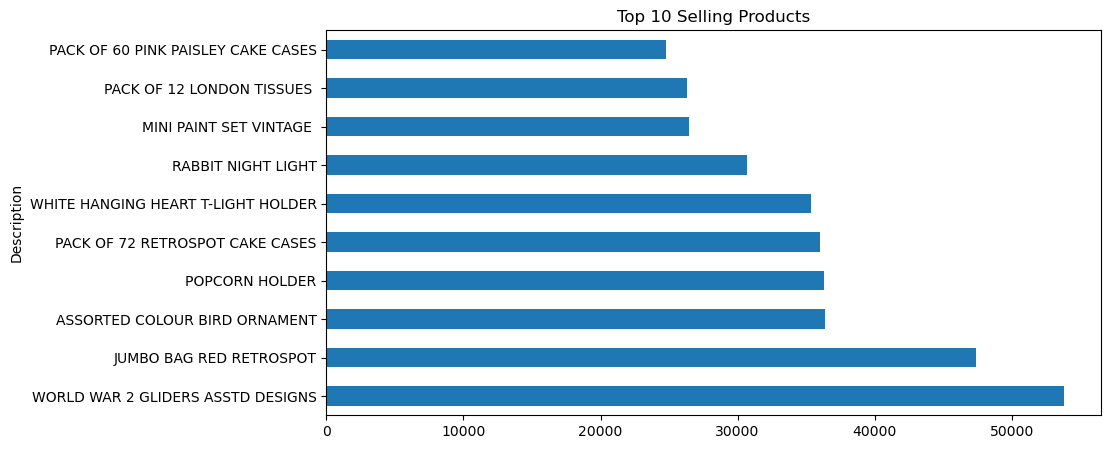

In [3]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Selling Products', figsize=(10,5))


<Axes: title={'center': 'Top 10 Countries by Sales'}, xlabel='Country'>

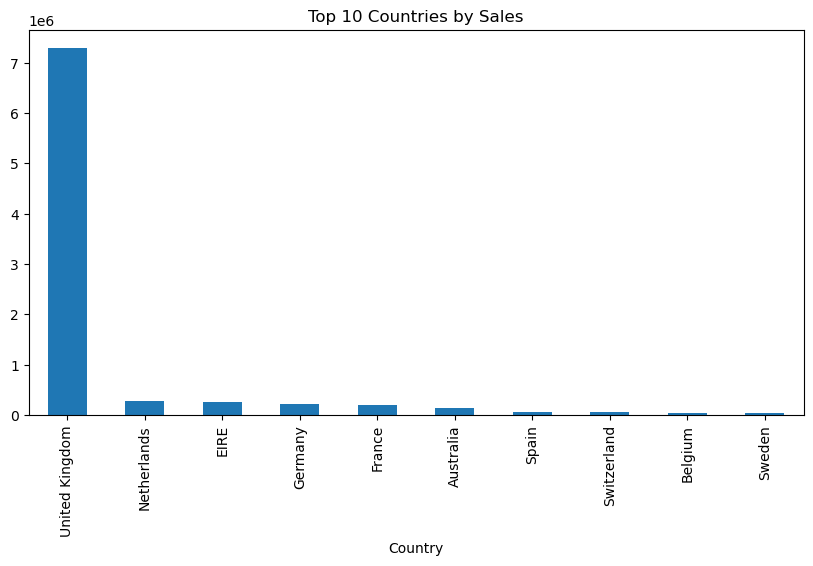

In [5]:
cleaned_df['TotalPrice'] = cleaned_df['Quantity'] * cleaned_df['UnitPrice']
country_sales = cleaned_df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
country_sales.head(10).plot(kind='bar', title='Top 10 Countries by Sales', figsize=(10,5))

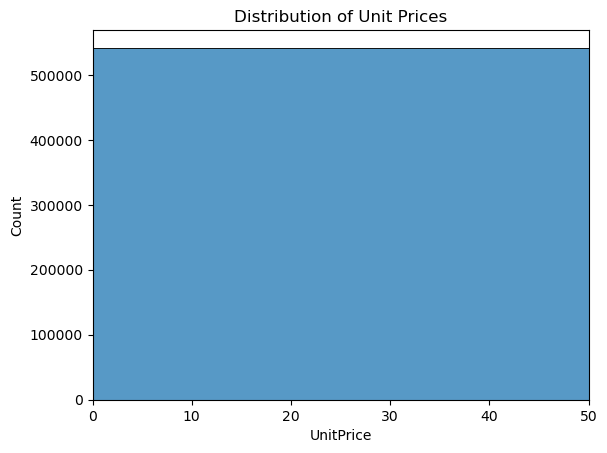

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['UnitPrice'], bins=50)
plt.title('Distribution of Unit Prices')
plt.xlim(0, 50)  # limit to remove outliers
plt.show()


In [9]:
import datetime as dt

# Reference date
snapshot_date = cleaned_df['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM table
rfm = cleaned_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm[rfm['Monetary'] > 0]
print(rfm.head())
print(rfm.describe())
rfm.head()

            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40
           Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     92.536422     4.272015    2048.688081
std     100.014169     7.697998    8985.230220
min       1.000000     1.000000       3.750000
25%      18.000000     1.000000     306.482500
50%      51.000000     2.000000     668.570000
75%     142.000000     5.000000    1660.597500
max     374.000000   209.000000  280206.020000


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Show cluster counts and sample data
print(rfm['Cluster'].value_counts())
print(rfm.head())
rfm.head()  # This will display the DataFrame in the notebook output

Cluster
0    3054
2    1067
1     204
3      13
Name: count, dtype: int64
            Recency  Frequency  Monetary  Cluster
CustomerID                                       
12346.0         326          1  77183.60        1
12347.0           2          7   4310.00        0
12348.0          75          4   1797.24        0
12349.0          19          1   1757.55        0
12350.0         310          1    334.40        2


,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,326,1,77183.60,1
12347.0,2,7,4310.00,0
12348.0,75,4,1797.24,0
12349.0,19,1,1757.55,0
12350.0,310,1,334.40,2


In [12]:
from sklearn.metrics import silhouette_score

# Silhouette Score
score = silhouette_score(rfm_scaled, rfm['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.7109555372501


In [14]:
def clean_data(df):
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df = df.dropna(subset=['CustomerID', 'Description'])
    df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
    df['Description'] = df['Description'].str.strip()
    df['Country'] = df['Country'].str.strip()
    df = df.drop_duplicates()
    df = df.reset_index(drop=True)
    return df

# Apply the function and show output
cleaned_df = clean_data(df)
print(cleaned_df.head())
print("Shape:", cleaned_df.shape)
cleaned_df.head()  # This will display the DataFrame in the notebook output

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
Shape: (392692, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
def score_rfm(row):
    r_score = 5 if row['Recency'] <= 30 else 4 if row['Recency'] <= 60 else 3 if row['Recency'] <= 90 else 2
    f_score = 5 if row['Frequency'] > 20 else 4 if row['Frequency'] > 10 else 3 if row['Frequency'] > 5 else 2
    m_score = 5 if row['Monetary'] > 10000 else 4 if row['Monetary'] > 5000 else 3 if row['Monetary'] > 1000 else 2
    return r_score + f_score + m_score

rfm['RFM_Score'] = rfm.apply(score_rfm, axis=1)

# Show output
print(rfm[['Recency', 'Frequency', 'Monetary', 'RFM_Score']].head())
print(rfm['RFM_Score'].describe())
rfm.head()  # This will display the DataFrame in the notebook output

            Recency  Frequency  Monetary  RFM_Score
CustomerID                                         
12346.0         326          1  77183.60          9
12347.0           2          7   4310.00         11
12348.0          75          4   1797.24          8
12349.0          19          1   1757.55         10
12350.0         310          1    334.40          6
count    4338.000000
mean        8.369525
std         2.137031
min         6.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        15.000000
Name: RFM_Score, dtype: float64


,Recency,Frequency,Monetary,Cluster,RFM_Score
CustomerID,,,,,
12346.0,326,1,77183.60,1,9
12347.0,2,7,4310.00,0,11
12348.0,75,4,1797.24,0,8
12349.0,19,1,1757.55,0,10
12350.0,310,1,334.40,2,6


In [17]:
# Step 1: Import Libraries
import pandas as pd

# Step 2: Load the Dataset
df = pd.read_csv("Online Retail.csv", encoding='ISO-8859-1')

# Step 3: Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Step 4: Drop rows with missing CustomerID or Description
df = df.dropna(subset=['CustomerID', 'Description'])

# Step 5: Remove rows with Quantity <= 0 or UnitPrice <= 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Step 6: Strip leading/trailing whitespaces in text fields
df['Description'] = df['Description'].str.strip()
df['Country'] = df['Country'].str.strip()

# Step 7: Drop duplicate rows
df = df.drop_duplicates()

# Step 8: Reset index
df = df.reset_index(drop=True)

# Step 9: Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Step 10: Save the cleaned dataset to CSV
df.to_csv("Online_Retail_Cleaned.csv", index=False)

print("✅ Cleaned dataset saved as 'Online_Retail_Cleaned.csv'")


✅ Cleaned dataset saved as 'Online_Retail_Cleaned.csv'
